Case Meli

Questão 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams ['figure.figsize'] = 15,6

In [2]:
!pip install pmdarima

In [3]:
from pmdarima.arima import auto_arima

In [4]:
data= pd.read_csv('series.csv',sep = ',')
data

,CATEGORY,DATE,UNITS_SOLD
0,CATEG-1,2021-08-17,59
1,CATEG-1,2020-09-19,40
2,CATEG-2,2021-10-26,23
3,CATEG-1,2021-04-27,60
4,CATEG-2,2021-05-05,61
...,...,...,...
2681,CATEG-1,2021-02-18,78
2682,CATEG-2,2020-12-05,8
2683,CATEG-2,2020-02-05,3
2684,CATEG-2,2020-06-05,106


In [5]:
#Verificação do formato das variáveis
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CATEGORY    2686 non-null   object
 1   DATE        2686 non-null   object
 2   UNITS_SOLD  2686 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 63.1+ KB
None


In [6]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CATEGORY    2686 non-null   object        
 1   DATE        2686 non-null   datetime64[ns]
 2   UNITS_SOLD  2686 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 63.1+ KB
None


In [7]:
enulo=data.isnull()
nulos = data.isnull().sum()
print(nulos)

CATEGORY      0
DATE          0
UNITS_SOLD    0
dtype: int64


In [8]:
#Criando as 3 bases distintas para prever a venda de cada categoria
Data_CATEG1=data['CATEGORY']=='CATEG-1'
CATEG1 = data[Data_CATEG1]
print(CATEG1)

     CATEGORY       DATE  UNITS_SOLD
0     CATEG-1 2021-08-17          59
1     CATEG-1 2020-09-19          40
3     CATEG-1 2021-04-27          60
8     CATEG-1 2020-03-28          26
12    CATEG-1 2021-05-13          32
...       ...        ...         ...
2675  CATEG-1 2019-11-01          18
2677  CATEG-1 2020-03-06          23
2680  CATEG-1 2020-11-28          96
2681  CATEG-1 2021-02-18          78
2685  CATEG-1 2021-09-03          38

[887 rows x 3 columns]


In [9]:
Data_CATEG2=data['CATEGORY']=='CATEG-2'
CATEG2 = data[Data_CATEG2]
print(CATEG2)

     CATEGORY       DATE  UNITS_SOLD
2     CATEG-2 2021-10-26          23
4     CATEG-2 2021-05-05          61
7     CATEG-2 2020-08-23          28
10    CATEG-2 2020-01-25           3
11    CATEG-2 2019-10-14           3
...       ...        ...         ...
2663  CATEG-2 2019-11-14           3
2671  CATEG-2 2020-08-09          33
2682  CATEG-2 2020-12-05           8
2683  CATEG-2 2020-02-05           3
2684  CATEG-2 2020-06-05         106

[879 rows x 3 columns]


In [10]:
Data_CATEG3=data['CATEGORY']=='CATEG-3'
CATEG3 = data[Data_CATEG3]
print(CATEG3)

     CATEGORY       DATE  UNITS_SOLD
5     CATEG-3 2018-10-18           1
6     CATEG-3 2021-06-26        1462
9     CATEG-3 2020-06-11        1373
13    CATEG-3 2020-11-16        3666
14    CATEG-3 2021-08-15        1929
...       ...        ...         ...
2673  CATEG-3 2019-08-28         600
2674  CATEG-3 2020-06-12        1534
2676  CATEG-3 2019-07-16         984
2678  CATEG-3 2021-01-21        2251
2679  CATEG-3 2020-08-30        1372

[920 rows x 3 columns]


In [11]:
CATEG1.set_index('DATE', drop = True, inplace = True)

In [12]:
CATEG2.set_index('DATE', drop = True, inplace = True)

In [13]:
CATEG3.set_index('DATE', drop = True, inplace = True)

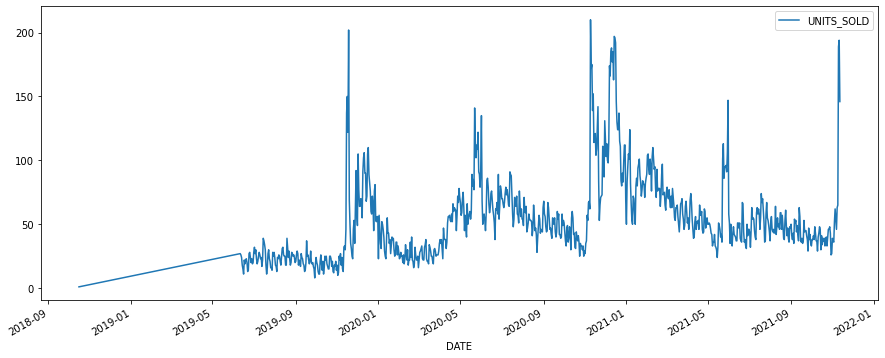

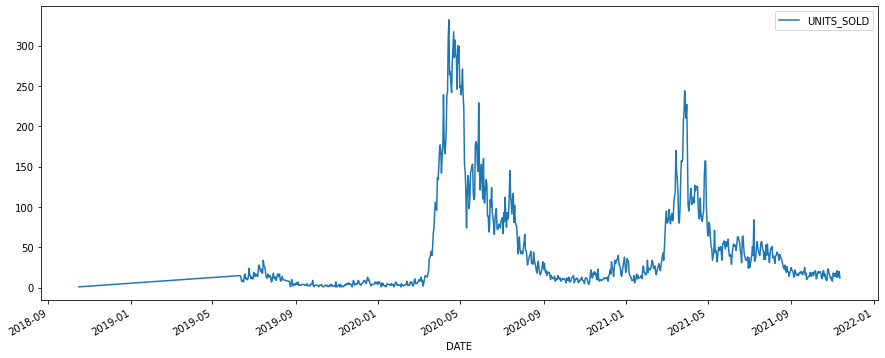

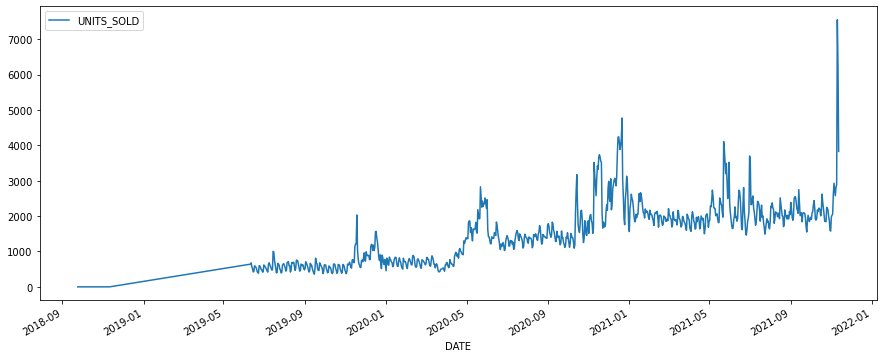

In [14]:
CATEG1.plot();
CATEG2.plot();
CATEG3.plot();

In [15]:
CATEG1 = CATEG1.drop(columns=['CATEGORY'])

In [16]:
CATEG2 = CATEG2.drop(columns=['CATEGORY'])

In [17]:
CATEG3 = CATEG3.drop(columns=['CATEGORY'])

In [18]:
CATEG1

,UNITS_SOLD
DATE,
2021-08-17,59
2020-09-19,40
2021-04-27,60
2020-03-28,26
2021-05-13,32
...,...
2019-11-01,18
2020-03-06,23
2020-11-28,96


In [19]:
Treino_CT1= CATEG1.loc['2018-01-01':'2020-12-31']
Teste_CT1= CATEG1.loc['2021-01-01':'2022-01-01']

In [20]:
Treino_CT2= CATEG2.loc['2018-01-01':'2020-12-31']
Teste_CT2= CATEG2.loc['2021-01-01':'2022-01-01']

In [21]:
Treino_CT3= CATEG3.loc['2018-01-01':'2020-12-31']
Teste_CT3= CATEG3.loc['2021-01-01':'2022-01-01']

In [22]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino CT1".format((len(Treino_CT1)/len(CATEG1.index)) * 100))
print("{0:0.2f}% nos dados de teste CT1".format((len(Teste_CT1)/len(CATEG1.index)) * 100))

# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino CT2".format((len(Treino_CT1)/len(CATEG2.index)) * 100))
print("{0:0.2f}% nos dados de teste CT2".format((len(Teste_CT1)/len(CATEG2.index)) * 100))

# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino CT3".format((len(Treino_CT1)/len(CATEG3.index)) * 100))
print("{0:0.2f}% nos dados de teste CT3".format((len(Teste_CT1)/len(CATEG3.index)) * 100))

64.37% nos dados de treino CT1
35.63% nos dados de teste CT1
64.96% nos dados de treino CT2
35.95% nos dados de teste CT2
62.07% nos dados de treino CT3
34.35% nos dados de teste CT3


In [64]:
#Modelo Auto Arima para Categoria 1

stepwise_model = auto_arima(CATEG1, start_p=1, start_q=1, max_p=6, max_q=6, m=1, start_P=0, seasonal = True, d=1, D=1, trace= True, error_action='ignore', surpress_warning = True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9309.634, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9010.252, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9307.634, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8923.291, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8855.473, Time=0.27 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=8812.794, Time=0.39 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=8798.394, Time=0.38 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=8783.549, Time=0.56 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(6,1,0)(0,0,0)[0]             : AIC=8781.550, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=8796.395, Time=0.26 sec
 ARIMA(6,1,1)(0,0,0)[0]             : AIC=inf, Time=0

In [65]:
print(stepwise_model.aic())

8781.550231836885


In [66]:
stepwise_model.fit(Treino_CT1)

ARIMA(order=(6, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [67]:
future_forecast = stepwise_model.predict(n_periods = 316)

In [68]:
future_forecast = pd.DataFrame(future_forecast, index=Teste_CT1.index, columns=['UNITS_SOLD'])

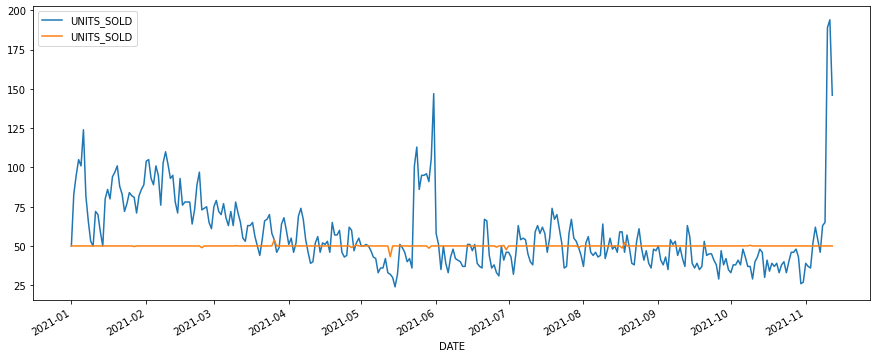

In [69]:
pd.concat([Teste_CT1,future_forecast],axis=1).plot();

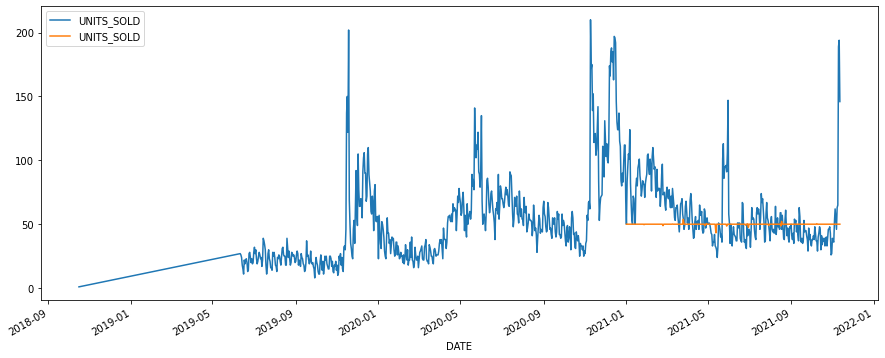

In [70]:
pd.concat([CATEG1,future_forecast],axis=1).plot();

In [72]:
#Previsão Categoria 1 com 21 passos a frente
future_forecast_21 = stepwise_model.predict(n_periods = 337)

In [78]:
future_forecast_21 = pd.DataFrame(future_forecast_21)
future_forecast_21

,0
0,48.671067
1,49.031828
2,43.218911
3,47.601276
4,49.275102
...,...
332,50.033679
333,50.033679
334,50.033679
335,50.033679


In [87]:
#Modelo Auto Arima para Categoria 2

stepwise_model2 = auto_arima(CATEG2, start_p=1, start_q=1, max_p=6, max_q=6, m=1, start_P=0, seasonal = True, d=1, D=1, trace= True, error_action='ignore', surpress_warning = True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10303.975, Time=12.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10010.048, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10301.976, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9926.155, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9855.826, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=9814.306, Time=0.15 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=9803.123, Time=0.20 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=9796.252, Time=0.17 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(6,1,0)(0,0,0)[0]             : AIC=9794.252, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=9801.122, Time=0.09 sec
 ARIMA(6,1,1)(0,0,0)[0]             : AIC=inf, Ti

In [88]:
print(stepwise_model2.aic())

9794.251506472894


In [89]:
stepwise_model2.fit(Treino_CT2)

ARIMA(order=(6, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [90]:
future_forecast2 = stepwise_model2.predict(n_periods = 316)

In [91]:
future_forecast2 = pd.DataFrame(future_forecast2, index=Teste_CT2.index, columns=['UNITS_SOLD'])

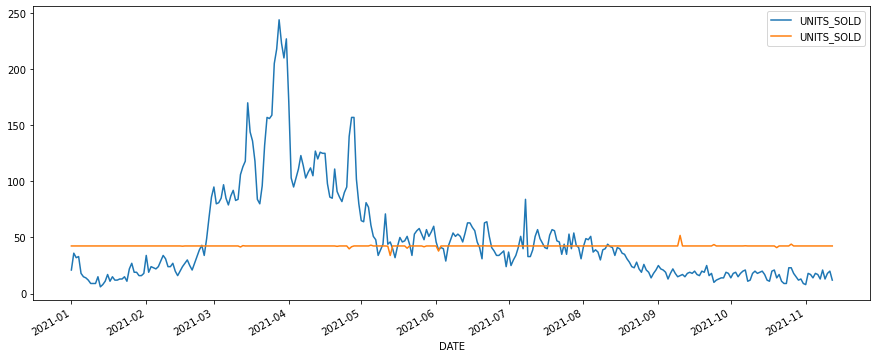

In [92]:
pd.concat([Teste_CT2,future_forecast2],axis=1).plot();

In [93]:
#Previsão Categoria 1 com 21 passos a frente
future_forecast2_21 = stepwise_model2.predict(n_periods = 337)

In [94]:
future_forecast2_21 = pd.DataFrame(future_forecast2_21)
future_forecast2_21

,0
0,44.077719
1,43.122683
2,33.955651
3,37.905751
4,40.436042
...,...
332,42.442510
333,42.442510
334,42.442510
335,42.442510


In [100]:
#Modelo Auto Arima para Categoria 2

stepwise_model3 = auto_arima(CATEG3, start_p=1, start_q=1, max_p=6, max_q=6, m=1, start_P=0, seasonal = True, d=1, D=1, trace= True, error_action='ignore', surpress_warning = True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15626.284, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15426.454, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15624.286, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15322.626, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=15232.235, Time=0.18 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=15205.080, Time=0.18 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=15184.855, Time=0.19 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=15166.067, Time=0.25 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(6,1,0)(0,0,0)[0]             : AIC=15164.059, Time=0.13 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=15182.840, Time=0.10 sec
 ARIMA(6,1,1)(0,0,0)[0]             : AIC=i

In [101]:
print(stepwise_model3.aic())

15164.059173098345


In [102]:
stepwise_model3.fit(Treino_CT3)

ARIMA(order=(6, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [103]:
future_forecast3 = stepwise_model3.predict(n_periods = 316)

In [104]:
future_forecast3 = pd.DataFrame(future_forecast3, index=Teste_CT3.index, columns=['UNITS_SOLD'])

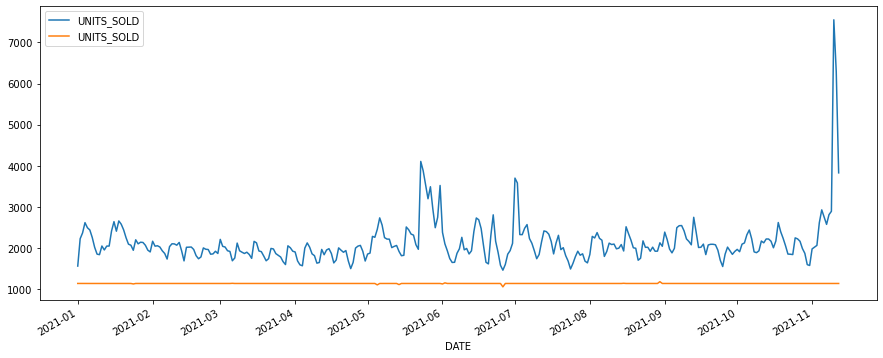

In [105]:
pd.concat([Teste_CT3,future_forecast3],axis=1).plot();

In [106]:
#Previsão Categoria 1 com 21 passos a frente
future_forecast3_21 = stepwise_model3.predict(n_periods = 337)

In [107]:
future_forecast3_21 = pd.DataFrame(future_forecast3_21)
future_forecast3_21

,0
0,1056.816906
1,1143.404162
2,1104.662919
3,1111.892612
4,1182.469494
...,...
332,1138.948209
333,1138.948209
334,1138.948209
335,1138.948209
